<a href="https://colab.research.google.com/github/MohammedAL-Ani/SA-with-TSP-using-Python/blob/main/TSP_moh_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TSP Moh-SA

## SIMULATED ANNEALING ALGORITHM Pseudocode
    s := s0; e := E (s)                           
    k := 0                                       
    while k < kmax and e > emin                  
      sn := neighbour (s)                         
      en := E (sn)                                
      if random() < P(e, en, temp(k/kmax)) then  
        s := sn; e := en                         
      k := k + 1                                 
    return s 

## Main function

In [ ]:
# coding: utf-8
import sys
import time
import math
import random

def ReadDic(dicPath = './dataset.txt'):
    dic={}
    with open(dicPath) as f:
        r=f.read()
        read_line = r.split('\n')              
        
        for i in range(len(read_line)):         
            read_element = read_line[i].split()
            dic[int(read_element[0])] = [int(read_element[1])]
            dic[int(read_element[0])].append(int(read_element[2]))        
        f.close()
    return dic

def initial(num): ## generate init city sequence
    seq = []
    while len(seq) < num:
        temp = random.randint(1,num)
        if temp not in seq:
            seq.append(temp)            
    return seq

def cost(seq,dic):    
    dist = 0
    for i in range(len(seq)):
        axis = [ dic[seq[i]][0]-dic[seq[(i+1)%len(seq)]][0],dic[seq[i]][1]-dic[seq[(i+1)%len(seq)]][1]]
        dist += math.sqrt(axis[0]*axis[0]+axis[1]*axis[1])  # distance(d)
    return dist
            
def swap(swap_num,c):
    c = c.copy()
    def selectIndexs(swap_num=swap_num,c=c):
        c = c.copy()
        swIndexs = []
        while(len(swIndexs) != swap_num):
            ranIndex = random.randint(0,len(c)-1)
            if ranIndex not in swIndexs:
                swIndexs.append(ranIndex)
        return swIndexs
    swIndexs1 = selectIndexs()
    swIndexs2 = selectIndexs()
    
    for i in range(len(swIndexs1)):
        tmp = c[swIndexs1[i]]
        c[swIndexs1[i]] = c[swIndexs2[i]]
        c[swIndexs2[i]] = tmp
    return c.copy()


## DEF

In [ ]:
NUM_CITIES =30
DIC = ReadDic()

## INIT

In [ ]:
pathSeq = initial(NUM_CITIES)
print('Path:',pathSeq,'\nCost=',cost(pathSeq,DIC))

Path: [2, 30, 18, 11, 27, 20, 9, 1, 6, 16, 28, 21, 17, 3, 12, 4, 8, 25, 13, 23, 14, 15, 22, 26, 29, 10, 5, 7, 19, 24] 
Cost= 909.0764621141714


In [ ]:
currentPath = pathSeq.copy()
currentVal = cost(currentPath,DIC)
nextPath = currentPath.copy()
nextVal = currentVal

BestSolution = currentPath.copy()
BestSolutionVal = currentVal

## SA-Algorithm

In [ ]:
valRec = []
T = 500
Itt = 1500
endItt=Itt

while(Itt > 0):
    nextPath = swap(3,currentPath)
    nextVal = cost(nextPath,DIC)
    if(nextVal < currentVal):
        currentPath = nextPath.copy()
        currentVal = nextVal
        lowest = nextPath.copy()
    else:
        change = abs(currentVal-nextVal) #abs:absolute value       
        r = random.random()
        if (math.exp(-1*(change/T)) >= r):        
            currentPath = nextPath.copy()
            currentVal = nextVal
            T = T*0.98
    if(currentVal < BestSolutionVal):
        BestSolution = currentPath.copy() # To keep the best solution
        BestSolutionVal = currentVal
    valRec.append(currentVal)
    Itt =Itt-1



print('lastsol:',currentPath,'\nCost=',currentVal,'\n')

print('Bestsol:',BestSolution,'\nCost=', BestSolutionVal)

lastsol: [18, 5, 2, 8, 20, 29, 21, 16, 9, 3, 28, 26, 22, 11, 4, 12, 24, 14, 25, 1, 6, 7, 23, 27, 17, 15, 10, 30, 13, 19] 
Cost= 544.5235705016867 

Bestsol: [18, 4, 1, 21, 20, 16, 9, 30, 8, 26, 3, 28, 29, 11, 27, 6, 24, 25, 14, 22, 2, 7, 23, 5, 10, 15, 17, 12, 13, 19] 
Cost= 536.1070975994301


# PLOT

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
# from core import *

def showPlot(PATH_SEQ,title):
    # Read
    DIC = ReadDic()
    with open('./dataset.txt','r') as f:
        dataset = f.read()
    dataset = dataset.split("\n")

    # x y
    x=[]
    y=[]
    for i in dataset:
        newi = i.split(" ")
        x.append(int(newi[1]))
        y.append(int(newi[2]))

    myX = []
    myY = []
    myPath = PATH_SEQ
    for i in myPath:
        _x,_y = DIC[i]
        myX.append(_x)
        myY.append(_y)
    
    # matplotlib.rcParams['axes.unicode_minus'] = False
    fig, ax = plt.subplots(figsize=(15,7))
    ax.plot(x, y, 'o',color ='chartreuse')
    ax.set_title(title,color='blue')
    plt.plot(myX,myY,linestyle='--',color='maroon')
    plt.show()

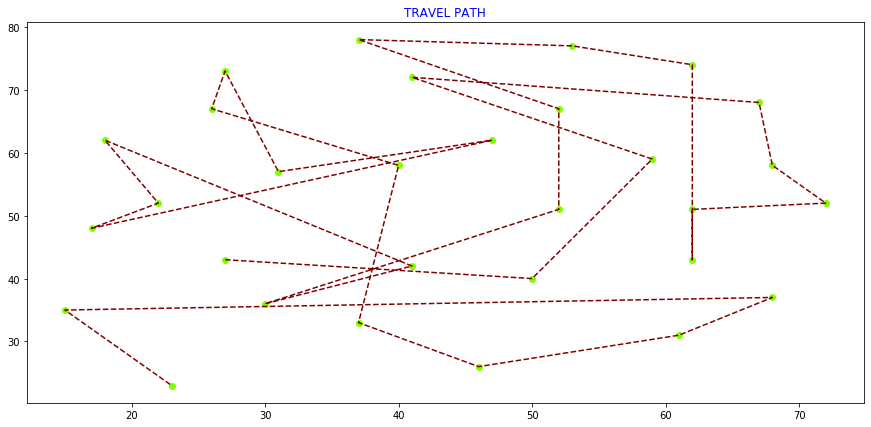

In [ ]:
showPlot(currentPath,'TRAVEL PATH')

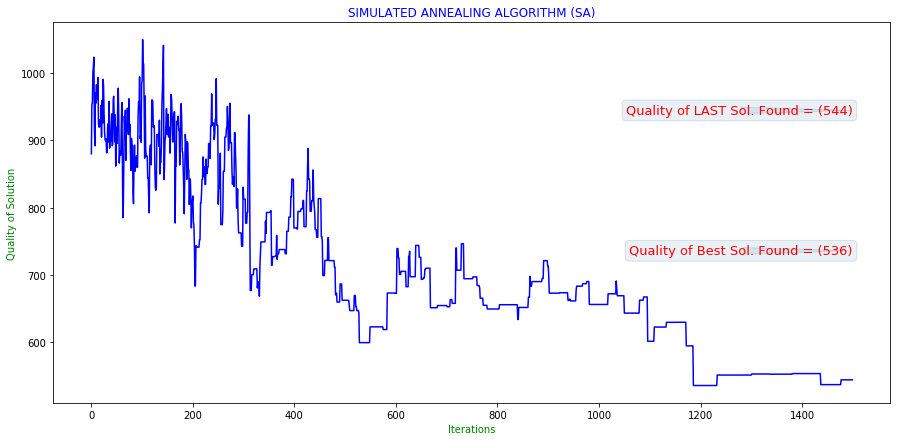

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(valRec,color ="b")
plt.title('SIMULATED ANNEALING ALGORITHM (SA)',color='blue')
plt.xlabel('Iterations',color ='green')
plt.ylabel('Quality of Solution',color ='green')
plt.annotate('Quality of LAST Sol. Found = (%.2d)'%( currentVal), xy=(endItt, currentVal+400),
             color="red",xycoords='data',size=13, ha='right', va="center", bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))
plt.annotate('Quality of Best Sol. Found = (%.2d)'%( BestSolutionVal), xy=(endItt, BestSolutionVal+200),
             color="red",xycoords='data',size=13, ha='right', va="center", bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))

plt.show()